# Bayes ratios

In [45]:
import json 

def get_evidence(path):


    # Opening JSON file
    f = open(path)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)


    return data["log_evidence"]




def parse_filename(f):

    return float(f.split('_')[4]) #this is the h value


def bayes_factor(f1,f2):


    evidence1 = get_evidence(f1)
    evidence2 = get_evidence(f2)

    print(f1, evidence1)
    print(f2, evidence2)
    return evidence1-evidence2


In [29]:
import glob 


list_of_model_files = sorted(glob.glob("../data/nested_sampling/scp_dir/V3Bayes*earth*.json"))
list_of_null_files = sorted(glob.glob("../data/nested_sampling/scp_dir/V3Bayes*null*.json"))

In [30]:

import numpy as np 
N = len(list_of_model_files)

strains = np.zeros(N)
bayes_factors = np.zeros(N) 
for i in range(N):
    print(i)

    assert parse_filename(list_of_model_files[i]),parse_filename(list_of_null_files[i]) #check h of each file is the same

    strains[i] = parse_filename(list_of_model_files[i])
    bayes_factors[i] =  bayes_factor(list_of_model_files[i],list_of_null_files[i])
 



In [33]:
#sort in order of strain
p = strains.argsort()
x = strains[p]
y = bayes_factors[p]

In [37]:
y 

array([-1.68726669e-01, -3.17777458e-01,  1.85847981e+01,  1.36522957e+02,
        8.85111492e+02,  4.08356597e+03,  1.55355219e+04,  8.72361893e+04,
        4.03994736e+05,  1.87191661e+06])

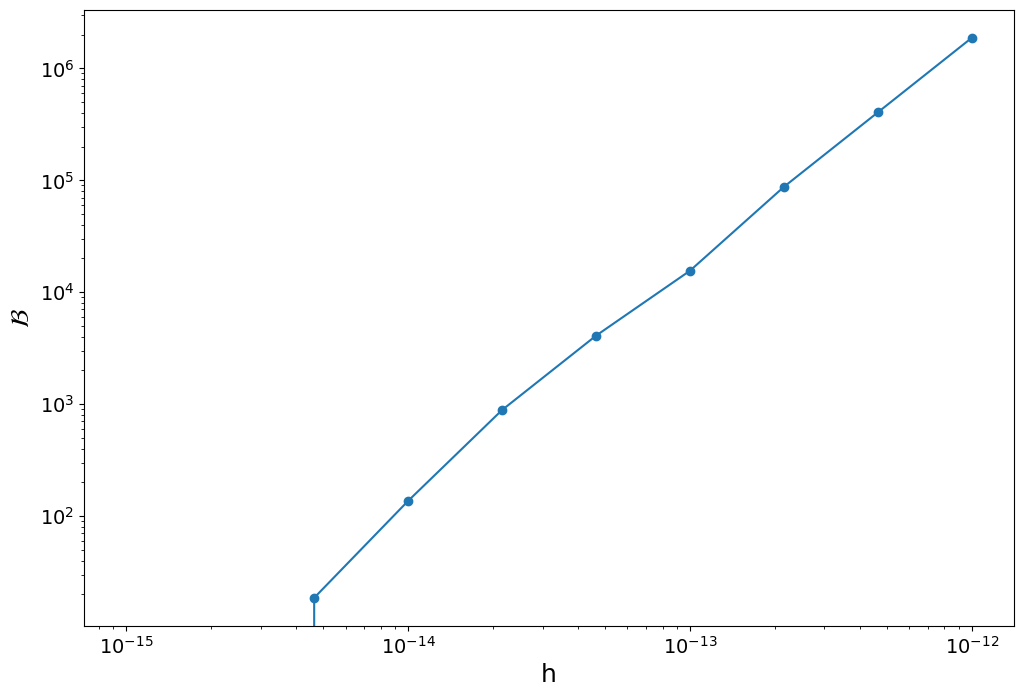

In [47]:
import matplotlib.pyplot as plt 
import scienceplots


h,w = 12,8
rows = 1
cols = 1
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w))


ax.scatter(x,y)
ax.plot(x,y)



ax.set_xscale('log')
ax.set_yscale('log')



fs=18
ax.set_xlabel('h', fontsize=fs)
ax.set_ylabel(r'$\mathcal{B}$', fontsize=fs)

ax.xaxis.set_tick_params(labelsize=fs-4)
ax.yaxis.set_tick_params(labelsize=fs-4)









In [48]:
h_range = np.logspace(-15,-12,10)

In [49]:
h_range

array([1.00000000e-15, 2.15443469e-15, 4.64158883e-15, 1.00000000e-14,
       2.15443469e-14, 4.64158883e-14, 1.00000000e-13, 2.15443469e-13,
       4.64158883e-13, 1.00000000e-12])

In [50]:
h_range = np.logspace(-15,-12,101)

In [51]:
h_range

array([1.00000000e-15, 1.07151931e-15, 1.14815362e-15, 1.23026877e-15,
       1.31825674e-15, 1.41253754e-15, 1.51356125e-15, 1.62181010e-15,
       1.73780083e-15, 1.86208714e-15, 1.99526231e-15, 2.13796209e-15,
       2.29086765e-15, 2.45470892e-15, 2.63026799e-15, 2.81838293e-15,
       3.01995172e-15, 3.23593657e-15, 3.46736850e-15, 3.71535229e-15,
       3.98107171e-15, 4.26579519e-15, 4.57088190e-15, 4.89778819e-15,
       5.24807460e-15, 5.62341325e-15, 6.02559586e-15, 6.45654229e-15,
       6.91830971e-15, 7.41310241e-15, 7.94328235e-15, 8.51138038e-15,
       9.12010839e-15, 9.77237221e-15, 1.04712855e-14, 1.12201845e-14,
       1.20226443e-14, 1.28824955e-14, 1.38038426e-14, 1.47910839e-14,
       1.58489319e-14, 1.69824365e-14, 1.81970086e-14, 1.94984460e-14,
       2.08929613e-14, 2.23872114e-14, 2.39883292e-14, 2.57039578e-14,
       2.75422870e-14, 2.95120923e-14, 3.16227766e-14, 3.38844156e-14,
       3.63078055e-14, 3.89045145e-14, 4.16869383e-14, 4.46683592e-14,
      

In [46]:



i = 6 
h = parse_filename(list_of_model_files[i])
B = bayes_factor(list_of_model_files[i],list_of_null_files[i])
 
print(h,B)


../data/nested_sampling/scp_dir/V3Bayes_h_2.1544346900318867e-15_model_earth_seed_1237_result.json 585723.7821842894
../data/nested_sampling/scp_dir/V3Bayes_h_2.1544346900318867e-15_model_null_seed_1237_result.json 585724.0999617478
2.1544346900318867e-15 -0.3177774583455175


In [42]:
list_of_model_files

['../data/nested_sampling/scp_dir/V3Bayes_h_1e-12_model_earth_seed_1237_result.json',
 '../data/nested_sampling/scp_dir/V3Bayes_h_1e-13_model_earth_seed_1237_result.json',
 '../data/nested_sampling/scp_dir/V3Bayes_h_1e-14_model_earth_seed_1237_result.json',
 '../data/nested_sampling/scp_dir/V3Bayes_h_1e-15_model_earth_seed_1237_result.json',
 '../data/nested_sampling/scp_dir/V3Bayes_h_2.154434690031878e-13_model_earth_seed_1237_result.json',
 '../data/nested_sampling/scp_dir/V3Bayes_h_2.1544346900318866e-14_model_earth_seed_1237_result.json',
 '../data/nested_sampling/scp_dir/V3Bayes_h_2.1544346900318867e-15_model_earth_seed_1237_result.json',
 '../data/nested_sampling/scp_dir/V3Bayes_h_4.6415888336127726e-14_model_earth_seed_1237_result.json',
 '../data/nested_sampling/scp_dir/V3Bayes_h_4.641588833612772e-13_model_earth_seed_1237_result.json',
 '../data/nested_sampling/scp_dir/V3Bayes_h_4.641588833612772e-15_model_earth_seed_1237_result.json']

In [43]:
x

array([1.00000000e-15, 2.15443469e-15, 4.64158883e-15, 1.00000000e-14,
       2.15443469e-14, 4.64158883e-14, 1.00000000e-13, 2.15443469e-13,
       4.64158883e-13, 1.00000000e-12])